# Predicting 30-day Hospital Readmissions

In [1]:
#import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data file
rawdata_df = pd.read_csv('diabetes.csv', na_values = "?", engine='python')

In [3]:
#shape of the dataframe
rawdata_df.shape

(101766, 50)

## Data Exploration and Cleaning

In [4]:
#make a copy of the dataframe
cleandata_df = rawdata_df.copy()

#checking for the number of missing values per feature (if > 0)
for x in cleandata_df.columns:
    is_object = cleandata_df[x].dtype
    if (is_object == object and 
        cleandata_df[x][cleandata_df[x] == '?'].count() > 0):
        print(x,': % missing values - ', 
              cleandata_df[x][cleandata_df[x] == '?'].count()*100/cleandata_df[x].count())

In [5]:
#drop the feature 'weight'
cleandata_df.drop(['weight'], inplace = True, axis = 1)

In [6]:
#check the shape again 
cleandata_df.shape

(101766, 49)

In [7]:
#replace missing values with NaN
cleandata_df.replace('Unknown/Invalid', np.NaN, inplace = True)

In [8]:
#checking if '?'s are replaced with NaN
for z in cleandata_df.columns:
    is_object1 = cleandata_df[z].dtype
    if is_object1 == object and cleandata_df[z][cleandata_df[z] == '?'].count() > 0:
        print(z, ': % missing values - ', cleandata_df[z][cleandata_df[z] == '?'].count()*100/cleandata_df[z].count())

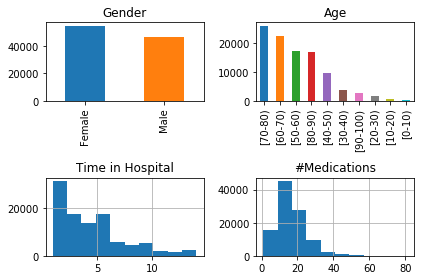

In [9]:
#bar charts for categorical data and histograms for continuous
plt.subplot(2,2,1)
cleandata_df['gender'].value_counts().plot(kind = 'bar')
plt.title('Gender')

plt.subplot(2,2,2)
cleandata_df['age'].value_counts().plot(kind = 'bar')
plt.title('Age')

plt.subplot(2,2,3)
cleandata_df['time_in_hospital'].hist()
plt.title('Time in Hospital')

plt.subplot(2,2,4)
cleandata_df['num_medications'].hist()
plt.title('#Medications')

plt.tight_layout()
plt.show()

## Preparing Data for Analysis

In [10]:
#checking for number of readmissions within 30 days
cleandata_df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [11]:
#converting readmitted < 30 days value to 1 and rest to 0
readmitted_values = {"readmitted": {"NO": 0, ">30": 0, "<30": 1}}
cleandata_df.replace(readmitted_values, inplace = True)

In [12]:
cleandata_df['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [13]:
sns.set(style="ticks", color_codes=True)

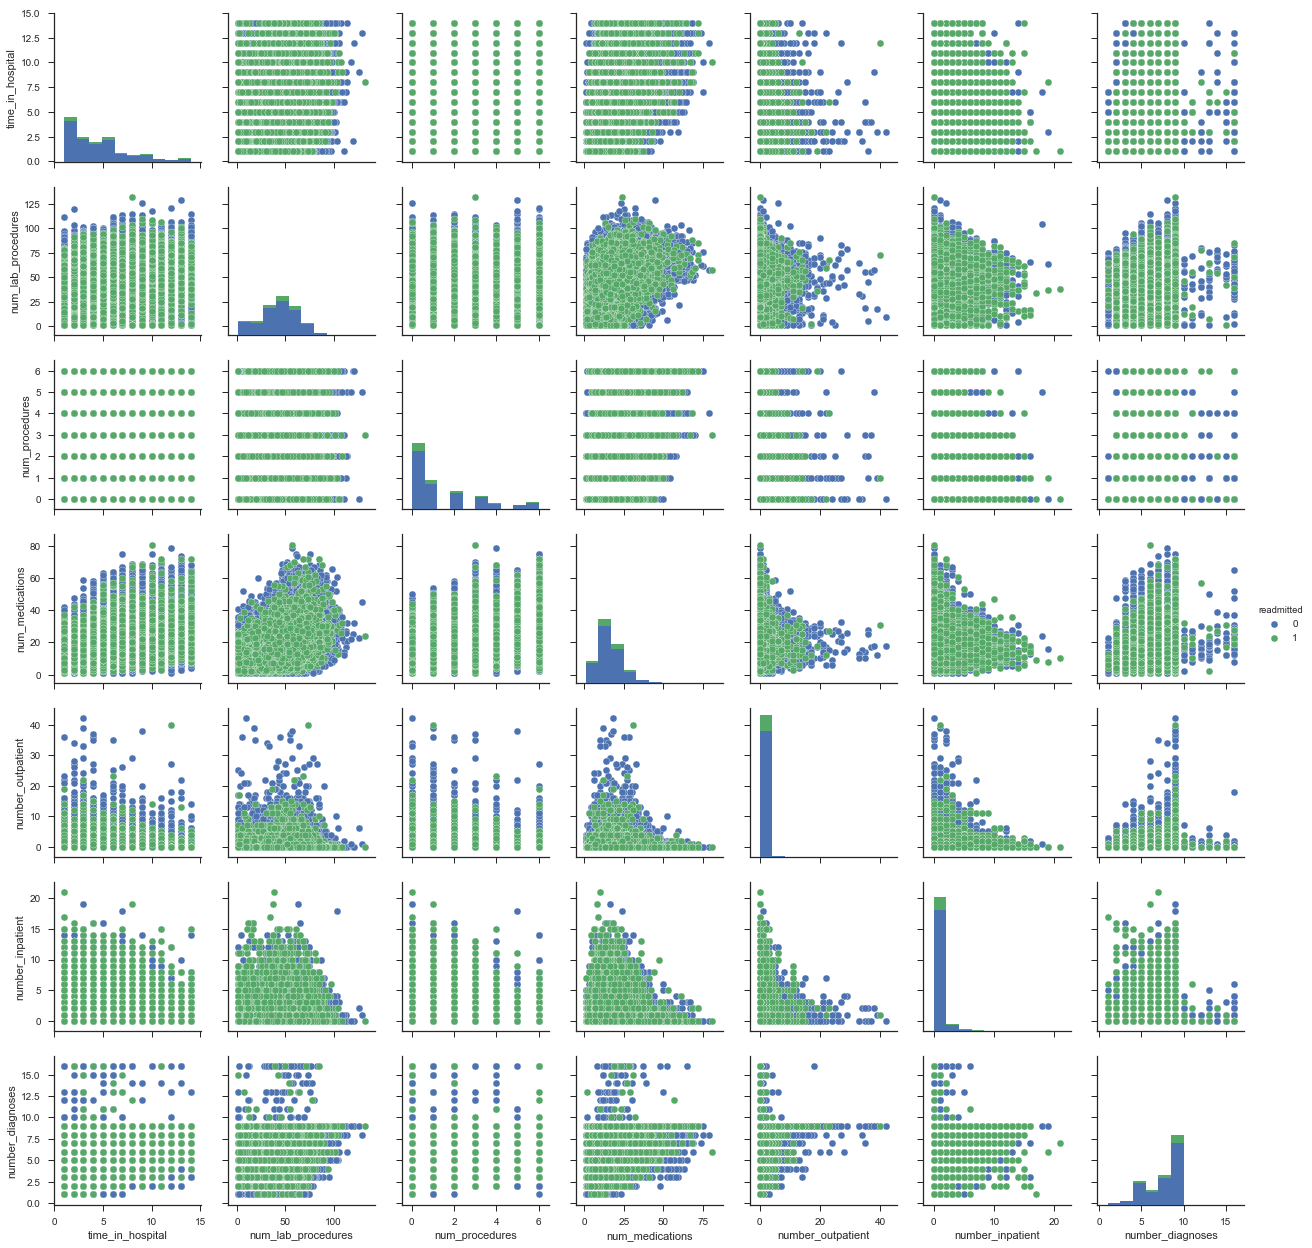

In [14]:
sns.pairplot(cleandata_df, vars = ["time_in_hospital", "num_lab_procedures",
                                   "num_procedures", "num_medications", 
                                   "number_outpatient", "number_inpatient", 
                                   "number_diagnoses"], 
            hue = "readmitted")